In [14]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key
from datetime import datetime
from citipy import citipy
import time

In [2]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f206cc2a2ca26c97b382be8572a425c3


In [3]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

In [6]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city
    city_url = url +"&q=" + city
    
    # Log the URL, record and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")
        # Append the city information into the city data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        continue

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nikolskoye
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | kavieng
Processing Record 4 of Set 1 | narsaq
Processing Record 5 of Set 1 | kaitangata
Processing Record 6 of Set 1 | bolungarvik
City not found. Skipping...
Processing Record 7 of Set 1 | ban tak
Processing Record 8 of Set 1 | te anau
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | boyolangu
Processing Record 11 of Set 1 | rorvik
Processing Record 12 of Set 1 | bengkulu
Processing Record 13 of Set 1 | leningradskiy
Processing Record 14 of Set 1 | port elizabeth
Processing Record 15 of Set 1 | new norfolk
Processing Record 16 of Set 1 | guerrero negro
Processing Record 17 of Set 1 | ponta do sol
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | lakes entrance
Processing Record 20 of Set 1 | agua fria
Processing Record 21 of Set 1 | yar-sale
Processing Record 22 of

Processing Record 40 of Set 4 | berlevag
Processing Record 41 of Set 4 | sorong
Processing Record 42 of Set 4 | ornskoldsvik
Processing Record 43 of Set 4 | makakilo city
Processing Record 44 of Set 4 | clyde river
Processing Record 45 of Set 4 | artyom
Processing Record 46 of Set 4 | upernavik
Processing Record 47 of Set 4 | ayan
Processing Record 48 of Set 4 | kinsale
Processing Record 49 of Set 4 | cockburn town
Processing Record 50 of Set 4 | scottsboro
Processing Record 1 of Set 5 | maniwaki
Processing Record 2 of Set 5 | teya
Processing Record 3 of Set 5 | hasaki
Processing Record 4 of Set 5 | papenburg
Processing Record 5 of Set 5 | hofn
Processing Record 6 of Set 5 | dwarka
Processing Record 7 of Set 5 | dongsheng
Processing Record 8 of Set 5 | norman wells
Processing Record 9 of Set 5 | gat
Processing Record 10 of Set 5 | caravelas
Processing Record 11 of Set 5 | bathsheba
Processing Record 12 of Set 5 | irbeyskoye
Processing Record 13 of Set 5 | rio grande
Processing Record 1

Processing Record 28 of Set 8 | margate
Processing Record 29 of Set 8 | nanton
Processing Record 30 of Set 8 | lac-megantic
Processing Record 31 of Set 8 | ancud
Processing Record 32 of Set 8 | cherskiy
Processing Record 33 of Set 8 | koungheul
Processing Record 34 of Set 8 | taoudenni
Processing Record 35 of Set 8 | qeshm
Processing Record 36 of Set 8 | samusu
City not found. Skipping...
Processing Record 37 of Set 8 | kunszentmiklos
Processing Record 38 of Set 8 | sayyan
Processing Record 39 of Set 8 | akonolinga
Processing Record 40 of Set 8 | saint-georges
Processing Record 41 of Set 8 | half moon bay
Processing Record 42 of Set 8 | stornoway
Processing Record 43 of Set 8 | lavrentiya
Processing Record 44 of Set 8 | kahului
Processing Record 45 of Set 8 | eskasem
City not found. Skipping...
Processing Record 46 of Set 8 | dongning
Processing Record 47 of Set 8 | druzhba
Processing Record 48 of Set 8 | ostashkov
Processing Record 49 of Set 8 | kuybysheve
Processing Record 50 of Set 

Processing Record 15 of Set 12 | kohlu
Processing Record 16 of Set 12 | ihosy
Processing Record 17 of Set 12 | ossora
Processing Record 18 of Set 12 | derzhavinsk
Processing Record 19 of Set 12 | juba
Processing Record 20 of Set 12 | dunedin
Processing Record 21 of Set 12 | nordfjordeid
Processing Record 22 of Set 12 | narok
Processing Record 23 of Set 12 | praia
Processing Record 24 of Set 12 | elizabeth city
Processing Record 25 of Set 12 | macia
Processing Record 26 of Set 12 | potam
Processing Record 27 of Set 12 | heinola
Processing Record 28 of Set 12 | barkly west
Processing Record 29 of Set 12 | palana
Processing Record 30 of Set 12 | guantanamo
Processing Record 31 of Set 12 | westport
Processing Record 32 of Set 12 | muzambinho
Processing Record 33 of Set 12 | gulshat
City not found. Skipping...
Processing Record 34 of Set 12 | sistranda
Processing Record 35 of Set 12 | shelburne
Processing Record 36 of Set 12 | paranhos
Processing Record 37 of Set 12 | bonga
Processing Recor

In [7]:
len(city_data)

576

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nikolskoye,59.70,30.79,32.00,86,0,4.47,RU,2020-04-14 01:52:03
1,Port Alfred,-33.59,26.89,59.00,79,95,3.00,ZA,2020-04-14 01:52:04
2,Kavieng,-2.57,150.80,84.67,69,100,3.60,PG,2020-04-14 01:52:04
3,Narsaq,60.92,-46.05,30.20,86,99,5.17,GL,2020-04-14 01:52:06
4,Kaitangata,-46.28,169.85,48.99,67,99,4.00,NZ,2020-04-14 01:52:06
5,Ban Tak,17.04,99.08,84.99,61,24,5.50,TH,2020-04-14 01:52:07
6,Te Anau,-45.42,167.72,44.82,58,26,5.61,NZ,2020-04-14 01:52:08
7,Avarua,-21.21,-159.78,78.80,74,69,5.82,CK,2020-04-14 01:52:08
8,Boyolangu,-8.12,111.89,84.92,64,71,3.74,ID,2020-04-14 01:52:09
9,Rorvik,64.86,11.24,34.27,93,100,9.53,NO,2020-04-14 01:52:11


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nikolskoye,RU,2020-04-14 01:52:03,59.70,30.79,32.00,86,0,4.47
1,Port Alfred,ZA,2020-04-14 01:52:04,-33.59,26.89,59.00,79,95,3.00
2,Kavieng,PG,2020-04-14 01:52:04,-2.57,150.80,84.67,69,100,3.60
3,Narsaq,GL,2020-04-14 01:52:06,60.92,-46.05,30.20,86,99,5.17
4,Kaitangata,NZ,2020-04-14 01:52:06,-46.28,169.85,48.99,67,99,4.00
5,Ban Tak,TH,2020-04-14 01:52:07,17.04,99.08,84.99,61,24,5.50
6,Te Anau,NZ,2020-04-14 01:52:08,-45.42,167.72,44.82,58,26,5.61
7,Avarua,CK,2020-04-14 01:52:08,-21.21,-159.78,78.80,74,69,5.82
8,Boyolangu,ID,2020-04-14 01:52:09,-8.12,111.89,84.92,64,71,3.74
9,Rorvik,NO,2020-04-14 01:52:11,64.86,11.24,34.27,93,100,9.53


In [11]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the city_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

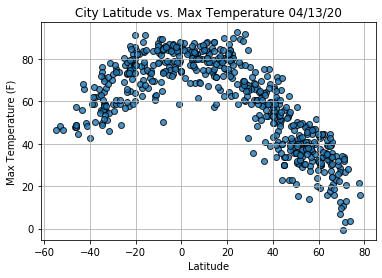

In [16]:
# Build the scatter plot for latitude vs max temperature
plt.scatter(lats, max_temps, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

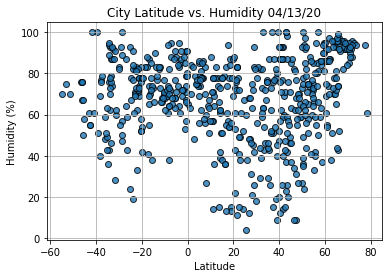

In [17]:
# Build the scatter plot for latitude vs humidity
plt.scatter(lats, humidity, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

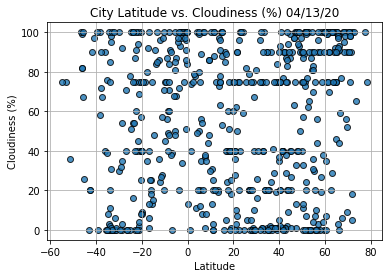

In [19]:
# Build the scatter plots for latitude vs cloudiness
plt.scatter(lats, cloudiness, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

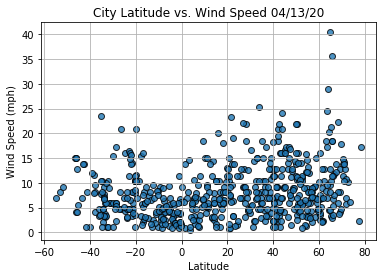

In [21]:
# Build the scatter plots for latitude vs wind speed
plt.scatter(lats, wind_speed, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()